<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1999 non-null   object 
 1   song              1999 non-null   object 
 2   duration_ms       1999 non-null   int64  
 3   explicit          1999 non-null   object 
 4   year              1999 non-null   int64  
 5   popularity        1999 non-null   int64  
 6   danceability      1999 non-null   float64
 7   energy            1999 non-null   float64
 8   key               1999 non-null   int64  
 9   loudness          1999 non-null   float64
 10  mode              1999 non-null   int64  
 11  speechiness       1999 non-null   float64
 12  acousticness      1999 non-null   float64
 13  instrumentalness  1999 non-null   float64
 14  liveness          1999 non-null   float64
 15  valence           1999 non-null   float64
 16  tempo             1999 non-null   float64


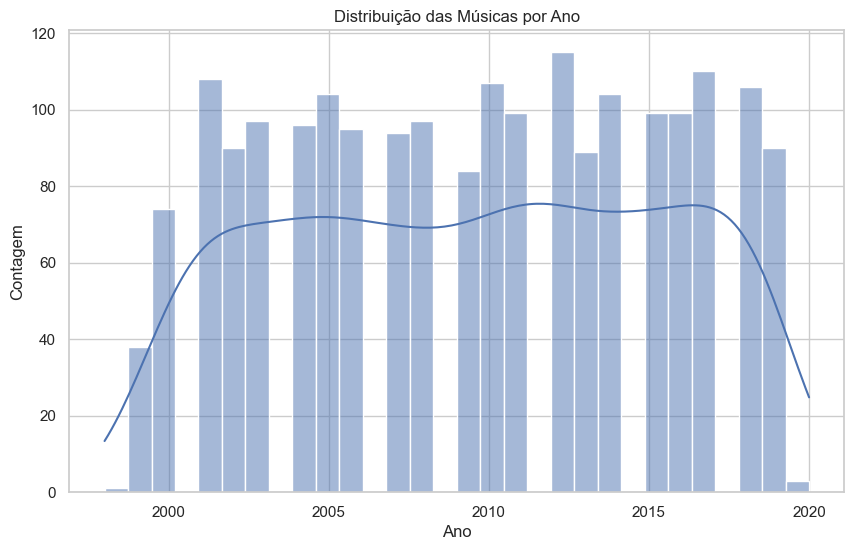

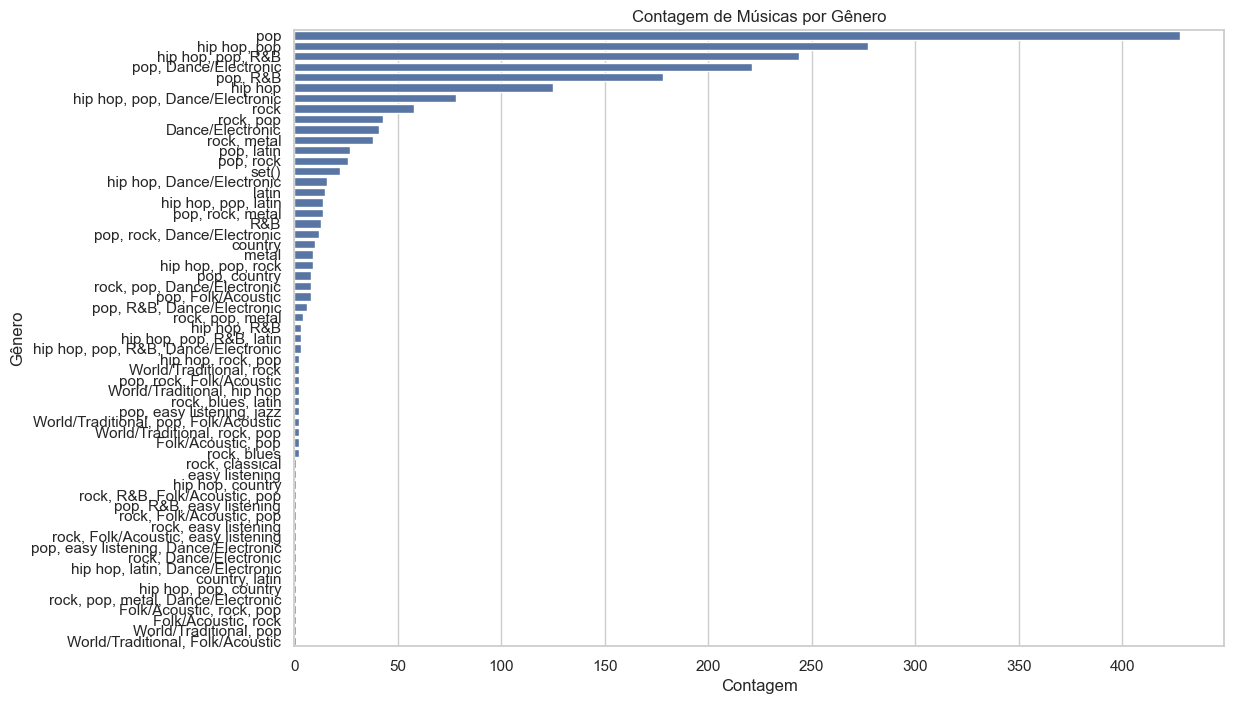

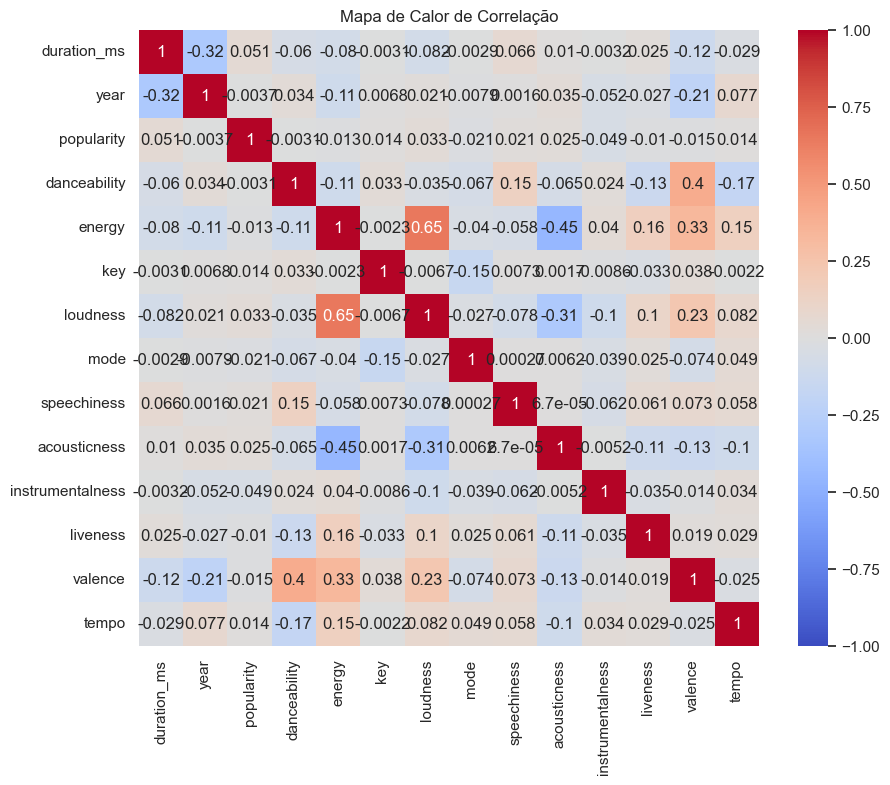

Valores ausentes por coluna:
 artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64
Outliers identificados:
 Empty DataFrame
Columns: [artist, song, duration_ms, explicit, year, popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, genre]
Index: []
Dados processados salvos em: ../data/processed/songs_processed.csv


C:\Users\marco\AppData\Local\Temp\ipykernel_5552\849487788.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)


In [1]:
# Preparação de Dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set(style="whitegrid")

# Caminho para o arquivo de dados brutos
raw_data_path = '../data/raw/songs.json'

# Carregar os dados em um DataFrame
df = pd.read_json(raw_data_path)

# Exibir as primeiras linhas do DataFrame
df.head()

# Informações básicas sobre os dados
df.info()

# Estatísticas descritivas
df.describe(include='all')

# Distribuição das músicas por ano
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=30, kde=True)
plt.title('Distribuição das Músicas por Ano')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.show()

# Contagem de músicas por gênero
plt.figure(figsize=(12, 8))
sns.countplot(y=df['genre'], order=df['genre'].value_counts().index)
plt.title('Contagem de Músicas por Gênero')
plt.xlabel('Contagem')
plt.ylabel('Gênero')
plt.show()

# Selecionar apenas colunas numéricas para o cálculo da correlação
numeric_df = df.select_dtypes(include=[np.number])

# Correlação entre variáveis numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlação')
plt.show()

# Verificar valores ausentes
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:\n", missing_values)

# Exemplo de tratamento: preencher valores ausentes com a mediana (dependendo da coluna)
df['year'].fillna(df['year'].median(), inplace=True)

# Exemplo de identificação de outliers usando o método IQR (Interquartile Range)
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['year'] < lower_bound) | (df['year'] > upper_bound)]
print("Outliers identificados:\n", outliers)

# Tratamento de outliers: pode variar (remoção, substituição, etc.)
df = df[(df['year'] >= lower_bound) & (df['year'] <= upper_bound)]

# Exemplo de conversão usando one-hot encoding
df = pd.get_dummies(df, columns=['genre'])

# Exibir as primeiras linhas do DataFrame transformado
df.head()

# Caminho para salvar os dados processados
processed_data_path = '../data/processed/songs_processed.csv'

# Salvar os dados processados em um arquivo CSV
df.to_csv(processed_data_path, index=False)

print(f"Dados processados salvos em: {processed_data_path}")
